# Lab 5 : Parsing

## Recap 

**What is Parsing?** : <br>
**What are context-free grammars?** : <br>
**What are the applications of parsing?**  <br>
**What are the commonly used algorithms used for parsing?** <br>
**What is structural ambiguity?**

----
<br>

What is Parsing? : Parsing is the process of analyzing a string of symbols, usually in the form of text, to determine its grammatical structure based on a set of rules or a grammar.

Context-free grammars (CFGs) are a type of formal grammar that describe the structure of a language using a set of production rules. These rules consist of a non-terminal symbol that can be replaced by a sequence of terminal and/or non-terminal symbols. CFGs are commonly used to describe the syntax of programming languages, natural languages, and other formal languages.

The applications of parsing include language processing tasks such as natural language understanding, machine translation, code compilation, and program analysis. Parsing is also used in text processing tasks such as information extraction, text-to-speech synthesis, and spell checking.

There are several algorithms used for parsing, including Recursive Descent Parsing, Bottom-Up Parsing, Earley Parsing, and CYK Parsing. Each algorithm has its own strengths and weaknesses, and the choice of algorithm depends on the type of grammar and the complexity of the input.

Structural ambiguity occurs when a sentence or phrase has more than one possible interpretation based on its grammatical structure. For example, the sentence "I saw the man with the telescope" can be interpreted as "I saw the man who was holding the telescope" or "I saw the man through the lens of a telescope." Structural ambiguity can create difficulties in language processing tasks such as machine translation and natural language understanding.

<br>

----

## Syntax tree

A Syntax tree or a parse tree is a tree representation of different syntactic categories of a sentence. It helps us to understand the syntactical structure of a sentence.

The standard way to represent the syntactic structure of a grammatical sentence

In [1]:
# Import required libraries
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag, word_tokenize, RegexpParser

[nltk_data] Downloading package punkt to /home/ivan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ivan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Example text
sample_text = "He clustered the data into information granules"

# Find all parts of speech in above sentence
tagged = pos_tag(word_tokenize(sample_text))

#Extract all parts of speech from any text
chunker = RegexpParser("""
					NP: {<DT>?<JJ>*<NN>} #To extract Noun Phrases
					P: {<IN>}			 #To extract Prepositions
					V: {<V.*>}			 #To extract Verbs
					PP: {<p> <NP>}		 #To extract Prepositional Phrases
					VP: {<V> <NP|PP>*}	 #To extract Verb Phrases
					""")

# Print all parts of speech in above sentence
output = chunker.parse(tagged)
print("After Extracting\n", output)

After Extracting
 (S
  He/PRP
  (VP (V clustered/VBD) (NP the/DT data/NN))
  (P into/IN)
  (NP information/NN)
  granules/NNS)


### Visualize the syntax tree

In [3]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'  

%matplotlib inline
!apt install ghostscript python3-tk

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


_XSERVTransSocketUNIXCreateListener: ...SocketCreateListener() failed
_XSERVTransMakeAllCOTSServerListeners: server already running
(EE) 
Fatal server error:
(EE) Cannot establish any listening sockets - Make sure an X server isn't already running(EE) 


E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


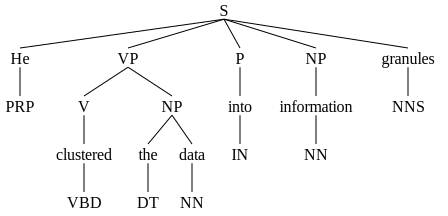

In [4]:
from IPython.display import display
display(output)

## 1. Dependency Parsing

In dependency parsing, we try to use dependency-based grammars to analyze and infer both structure and semantic dependencies and relationships between tokens in a sentence. 

![](https://files.realpython.com/media/displacy_dependency_parse.de72f9b1d115.png)

Dependency Parsing used in shallow parsing and named entity recognition



In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")

sentence_nlp = nlp("US unvails world's most powerful supercomputer, beats China")
sentence_nlp = nlp("Innopolis University is a university located in the city of Innopolis.")

In [6]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

## 2. Constituency Parsing

Constituent-based grammars are used to analyze and determine the constituents of a sentence. These grammars can be used to model or represent the internal structure of sentences in terms of a hierarchically ordered structure of their constituents. A constituency parser can be built based on such grammars/rules. The grammer has to be defined. 

One of the popular Constituency Parsing implementation is from stanford. A **probabilistic context-free grammar parser**

**TODO: Implement an example** <br>
Parser can be downloaded here : `https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip`

In [7]:
# Download and unzip the parser
!wget https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip
!unzip stanford-parser-4.2.0.zip

--2023-02-27 16:36:22--  https://nlp.stanford.edu/software/stanford-parser-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-parser-4.2.0.zip [following]
--2023-02-27 16:36:23--  https://downloads.cs.stanford.edu/nlp/software/stanford-parser-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182285548 (174M) [application/zip]
Saving to: ‘stanford-parser-4.2.0.zip’

stanford-parser-4.2 100%[===================>] 173,84M   617KB/s    in 9m 8s   

2023-02-27 16:45:33 (325 KB/s) - ‘stanford-parser-4.2.0.zip’ saved [182285548/182285548]

Archive:  stanford-parser-4.2.0.zip
   creati

In [2]:
import nltk, os
from nltk.parse.stanford import StanfordParser

os.environ['CLASSPATH'] = 'stanford-parser-full-2020-11-17/*'

scp = StanfordParser('stanford-parser-full-2020-11-17/stanford-parser.jar','stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')

sentence = "Innopolis University is a university located in the city of Innopolis."

result = list(scp.raw_parse(sentence))
print(result[0])

/tmp/ipykernel_97976/2960899494.py:6: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  scp = StanfordParser('stanford-parser-full-2020-11-17/stanford-parser.jar','stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar')


(ROOT
  (S
    (NP (NNP Innopolis) (NNP University))
    (VP
      (VBZ is)
      (NP
        (NP (DT a) (NN university))
        (VP
          (VBN located)
          (PP
            (IN in)
            (NP
              (NP (DT the) (NN city))
              (PP (IN of) (NP (NNP Innopolis))))))))
    (. .)))


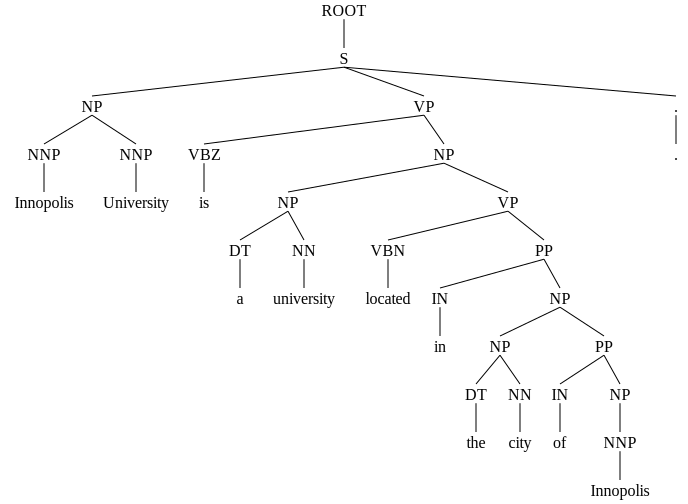

In [3]:
display(result[0])

## References 

1. [Tree Syntax of Natural Language](https://www.cs.cornell.edu/courses/cs474/2004fa/lec1.pdf)
1. [Stanford parser](https://nlp.stanford.edu/software/lex-parser.shtml)
1. [Constituency Parsing](https://web.stanford.edu/~jurafsky/slp3/13.pdf)

# As this content was already covered in Lab 3, the rest of the lab will be focused on how to apply deep learning in few steps, since many of you selected topics related to text generation.

- You'd better execute the next code in colab with GPU enabled.
- We will not dig into the architectures of these models, as it is the content for the following lectures.

## HuggingFace

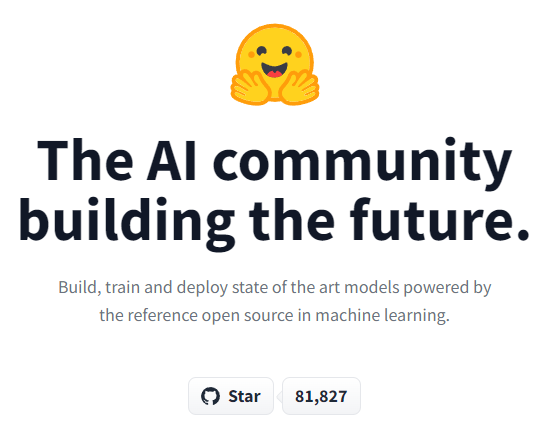

### [HuggingFace](https://huggingface.co) provides a repository of models and datasets, as well as the libraries to implement or load models.

## HuggingFace transformers package:
The library downloads pretrained models for Natural Language Understanding (NLU) tasks, such as analyzing the sentiment of a text, and Natural Language Generation (NLG), such as completing a prompt with new text or translating in another language.

### Sequence classification:
#### Sentiment Analysis
the task of classifying sequences according to a given number of classes. An example of using pipelines to do sentiment analysis: identifying if a sequence is positive or negative. It leverages a fine-tuned model on sst2.

In [4]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 2.2 MB/s eta 0:00:002.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.9.1
    Uninstalling huggingface-hub-0.9.1:
      Successfully uninstalled huggingface-hub-0.9.1

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
from transformers import pipeline

nlp = pipeline("sentiment-analysis")
result = nlp("I hate you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")
result = nlp("I love you")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


label: NEGATIVE, with score: 0.9991
label: POSITIVE, with score: 0.9999


#### Paraphrasing detection
an example of doing a sequence classification using a model to determine if two sequences are paraphrases of each other. The process is the following:

1. Instantiate a tokenizer and a model from the checkpoint name. The model is identified as a BERT model and loads it with the weights stored in the checkpoint.

2. Build a sequence from the two sentences, with the correct model-specific separators token type ids and attention masks (encode() and __call__() take care of this).

3. Pass this sequence through the model so that it is classified in one of the two available classes: 0 (not a paraphrase) and 1 (is a paraphrase).

4. Compute the softmax of the result to get probabilities over the classes.

5. Print the results.

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

classes = ["not paraphrase", "is paraphrase"]

sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = "Apples are especially bad for your health"
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

paraphrase = tokenizer(sequence_0, sequence_2, return_tensors="pt")
not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors="pt")

paraphrase_classification_logits = model(**paraphrase).logits
not_paraphrase_classification_logits = model(**not_paraphrase).logits

paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0]
not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0]
# Should be paraphrase
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(paraphrase_results[i] * 100))}%")
# Should not be paraphrase
for i in range(len(classes)):
    print(f"{classes[i]}: {int(round(not_paraphrase_results[i] * 100))}%")

not paraphrase: 10%
is paraphrase: 90%
not paraphrase: 94%
is paraphrase: 6%


#### Extractive Question Answering
Extractive Question Answering is the task of extracting an answer from a text given a question.

An example of a question answering dataset is the SQuAD dataset, which is entirely based on that task.

In [7]:
from transformers import pipeline
nlp = pipeline("question-answering")
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/question-answering/run_squad.py script.
"""

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


This returns an answer extracted from the text, a confidence score, alongside “start” and “end” values, which are the positions of the extracted answer in the text.


In [8]:
result = nlp(question="What is extractive question answering?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")
result = nlp(question="What is a good example of a question answering dataset?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'the task of extracting an answer from a text given a question', score: 0.6226, start: 34, end: 95
Answer: 'SQuAD dataset', score: 0.5053, start: 147, end: 160


In [9]:
# run this model on a different text and query

from transformers import pipeline

nlp = pipeline("question-answering")

context = r"""
The Great Barrier Reef is the world's largest coral reef system composed of over 2,900 individual reefs and 900 islands
stretching for over 2,300 kilometers (1,400 mi) over an area of approximately 344,400 square kilometers (133,000 sq mi).
The reef is located in the Coral Sea, off the coast of Queensland, Australia. The Great Barrier Reef can be seen from
outer space and is the world's biggest single structure made by living organisms. This reef structure is composed of and
built by billions of tiny organisms, known as coral polyps. It supports a wide diversity of life and was selected as a
World Heritage Site in 1981. CNN named it one of the seven natural wonders of the world.
"""

result = nlp(question="What is the Great Barrier Reef?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

result = nlp(question="What is the significance of the Great Barrier Reef?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Answer: 'the world's largest coral reef system', score: 0.4659, start: 27, end: 64
Answer: 'the world's biggest single structure made by living organisms', score: 0.1133, start: 379, end: 440


### Language Modeling
#### Masked Language Modeling

The objective of Masked Language Model (MLM) training is to hide a word in a sentence and then have the program predict what word has been hidden (masked) based on the hidden word's context. The objective of Next Sentence Prediction training is to have the program predict whether two given sentences have a logical, sequential connection or whether their relationship is simply random.

In [10]:
from transformers import pipeline
nlp = pipeline("fill-mask")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [11]:
from pprint import pprint
pprint(nlp(f"HuggingFace is creating a {nlp.tokenizer.mask_token} that the community uses to solve NLP tasks."))

[{'score': 0.17927433550357819,
  'sequence': 'HuggingFace is creating a tool that the community uses to solve '
              'NLP tasks.',
  'token': 3944,
  'token_str': ' tool'},
 {'score': 0.1134943887591362,
  'sequence': 'HuggingFace is creating a framework that the community uses to '
              'solve NLP tasks.',
  'token': 7208,
  'token_str': ' framework'},
 {'score': 0.05243557691574097,
  'sequence': 'HuggingFace is creating a library that the community uses to '
              'solve NLP tasks.',
  'token': 5560,
  'token_str': ' library'},
 {'score': 0.03493545204401016,
  'sequence': 'HuggingFace is creating a database that the community uses to '
              'solve NLP tasks.',
  'token': 8503,
  'token_str': ' database'},
 {'score': 0.028602516278624535,
  'sequence': 'HuggingFace is creating a prototype that the community uses to '
              'solve NLP tasks.',
  'token': 17715,
  'token_str': ' prototype'}]


In [13]:
# run this model on your own example sentence

from transformers import pipeline
nlp = pipeline("fill-mask")

from pprint import pprint
pprint(nlp(f"The {nlp.tokenizer.mask_token} of the world's oceans is still largely unexplored."))



No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.1345282644033432,
  'sequence': "The rest of the world's oceans is still largely unexplored.",
  'token': 1079,
  'token_str': ' rest'},
 {'score': 0.09913061559200287,
  'sequence': "The future of the world's oceans is still largely unexplored.",
  'token': 499,
  'token_str': ' future'},
 {'score': 0.0687551498413086,
  'sequence': "The fate of the world's oceans is still largely unexplored.",
  'token': 7658,
  'token_str': ' fate'},
 {'score': 0.04594556614756584,
  'sequence': "The surface of the world's oceans is still largely unexplored.",
  'token': 4084,
  'token_str': ' surface'},
 {'score': 0.04072652384638786,
  'sequence': "The history of the world's oceans is still largely unexplored.",
  'token': 750,
  'token_str': ' history'}]


#### Text generation
the goal is to create a coherent portion of text that is a continuation from the given context.

In [14]:
from transformers import pipeline
text_generator = pipeline("text-generation")
print(text_generator("As far as I am concerned, I will", max_length=50, do_sample=False))

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


/home/ivan/miniconda3/lib/python3.8/site-packages/transformers/generation/utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'As far as I am concerned, I will be the first to admit that I am not a fan of the idea of a "free market." I think that the idea of a free market is a bit of a stretch. I think that the idea'}]


In [15]:
# run this model on your sentence beginning
print(text_generator("In a world where machines can think and learn like humans,", max_length=50, do_sample=False))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In a world where machines can think and learn like humans, it's hard to imagine a world where machines can't learn.\n\nThe problem is that machines are not just learning. They are learning.\n\nThe problem is that machines are not"}]


### Named Entity recognition

In [16]:
from transformers import pipeline
nlp = pipeline("ner")
sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very " \
           "close to the Manhattan Bridge which is visible from the window."

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [17]:
print(nlp(sequence))

[{'entity': 'I-ORG', 'score': 0.99957865, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': 0.9909764, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}, {'entity': 'I-ORG', 'score': 0.9982224, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}, {'entity': 'I-ORG', 'score': 0.9994879, 'index': 4, 'word': 'Inc', 'start': 13, 'end': 16}, {'entity': 'I-LOC', 'score': 0.9994344, 'index': 11, 'word': 'New', 'start': 40, 'end': 43}, {'entity': 'I-LOC', 'score': 0.99931955, 'index': 12, 'word': 'York', 'start': 44, 'end': 48}, {'entity': 'I-LOC', 'score': 0.9993794, 'index': 13, 'word': 'City', 'start': 49, 'end': 53}, {'entity': 'I-LOC', 'score': 0.98625815, 'index': 19, 'word': 'D', 'start': 79, 'end': 80}, {'entity': 'I-LOC', 'score': 0.95142686, 'index': 20, 'word': '##UM', 'start': 80, 'end': 82}, {'entity': 'I-LOC', 'score': 0.9336589, 'index': 21, 'word': '##BO', 'start': 82, 'end': 84}, {'entity': 'I-LOC', 'score': 0.9761654, 'index': 28, 'word': 'Manhat

In [18]:
# run this model on your sentence

sequence = "I recently visited Paris and saw the Eiffel Tower, Notre Dame Cathedral, and the Louvre Museum."
print(nlp(sequence))

[{'entity': 'I-LOC', 'score': 0.9998247, 'index': 4, 'word': 'Paris', 'start': 19, 'end': 24}, {'entity': 'I-LOC', 'score': 0.8217536, 'index': 8, 'word': 'E', 'start': 37, 'end': 38}, {'entity': 'I-LOC', 'score': 0.8048147, 'index': 9, 'word': '##iff', 'start': 38, 'end': 41}, {'entity': 'I-LOC', 'score': 0.81223667, 'index': 10, 'word': '##el', 'start': 41, 'end': 43}, {'entity': 'I-LOC', 'score': 0.91857564, 'index': 11, 'word': 'Tower', 'start': 44, 'end': 49}, {'entity': 'I-LOC', 'score': 0.9977957, 'index': 13, 'word': 'Notre', 'start': 51, 'end': 56}, {'entity': 'I-LOC', 'score': 0.99534285, 'index': 14, 'word': 'Dame', 'start': 57, 'end': 61}, {'entity': 'I-LOC', 'score': 0.9843067, 'index': 15, 'word': 'Cathedral', 'start': 62, 'end': 71}, {'entity': 'I-LOC', 'score': 0.9314261, 'index': 19, 'word': 'Lou', 'start': 81, 'end': 84}, {'entity': 'I-LOC', 'score': 0.82322264, 'index': 20, 'word': '##vre', 'start': 84, 'end': 87}, {'entity': 'I-LOC', 'score': 0.826156, 'index': 21, 

### Summarization

In [19]:
from transformers import pipeline

summarizer = pipeline("summarization")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say .'}]


In [23]:
# run this model on a different text

ARTICLE = """
The Carnival of Brazil (Portuguese: Carnaval do Brasil, IPA: [kaʁnaˈvaw]) is an annual Brazilian festival held the Friday afternoon before Ash Wednesday at noon, which marks the beginning of Lent, the forty-day period before Easter. During Lent, Roman Catholics and some other Christians traditionally abstained from the consumption of meat and poultry, hence the term "carnival", from carnelevare, "to remove (literally, "raise") meat."[2]
Rhythm, participation, and costumes vary from one region of Brazil to another. In the southeastern cities of Rio de Janeiro, São Paulo, and Vitória, huge organized parades are led by samba schools. Those official parades are meant to be watched by the public, while minor parades (blocos) allowing public participation can be found in other cities, like Belo Horizonte,[3] also in the southeastern region. The northeastern cities of Recife, Olinda, Salvador, and Porto Seguro have organized groups parading through streets, and public interacts directly with them. It is a six-day party where crowds follow the trios elétricos through the city streets, dancing and singing. Also in northeast, Olinda carnival features unique characteristics, heavily influenced by local folklore and cultural manifestations, such as Frevo and Maracatu. 
The typical genres of music of Brazilian carnival are, in the Southeast Region in general, mostly cities of Rio de Janeiro and São Paulo: the samba-enredo, the samba de bloco, the samba de embalo and the marchinha; and in the Northeast Region including Pernambuco (mostly cities of Olinda and Recife): frevo and maracatu, and Bahia (mostly the city of Salvador): samba-reggae, pagode (also a type of Samba) and the main genre axé music. These rhythms were mainly developed by Afro-brazlians and Pardos, incorporating and adapting many cultural influences, from the percussion beats of Africa to the military fanfares of Europe and iberian music in the use of instruments like pandeiro and cavaquinho. 
"""
print(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': ' The Carnival of Brazil (Portuguese: Carnaval do Brasil, IPA: [kaʁnaˈvaw) is an annual Brazilian festival held the Friday afternoon before Ash Wednesday at noon . It marks the beginning of Lent, the forty-day period before Easter . During Lent, Roman Catholics and some other Christians traditionally abstained from the consumption of meat and poultry, hence the term "carnival"'}]


### Translation

In [22]:
from transformers import pipeline
translator = pipeline("translation_en_to_fr")  
# not alls languages present here, you can go to huggingface and search for 
# translation models of your choice, most of models usually have usage example. 
print(translator("Hugging Face is a technology company based in New York and Paris", max_length=40))

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/home/ivan/miniconda3/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': 'Hugging Face est une entreprise technologique basée à New York et à Paris.'}]


In [24]:
# take a different language pair and translte your sentence
print(translator("The quick brown fox jumps over the lazy dog.", max_length=40))


[{'translation_text': 'Le renard brun rapide saute au-dessus du chien lazy.'}]


### Task: find a multilingual BERT model in hugging face and write its name ([link](https://huggingface.co/models))

One multilingual BERT model available in Hugging Face is called "bert-base-multilingual-cased". This model is trained on a large corpus of text in 104 different languages and has a cased vocabulary, meaning that the model distinguishes between uppercase and lowercase letters. The model is based on the original BERT architecture developed by Google and has 12 layers and 110 million parameters.

## How to choose between Transformer, BERT and GPT?

These are generally the same architecture adapted to different kinds of tasks, and consequently, have different pretraining methodologies:
- Transformer is used for sequence-to-sequence tasks, e.g. neural machine translation or summarization. The crucial moment is that the lengths of the input and output sequences can be different. For the pretrained models, you can look at T5 models from Google.
- BERT is simply encoder part of Transformer and used for embedding, tagging or classification tasks. In case of classification, a special token \[CLS\] is used that is trained to represent the whole input sequence.
- GPT is Transformer decoder without encoder. It is used for text generation tasks (i.e. language modeling), including dialogue conversations, question answering, etc.

## You can write me (https://t.me/valeev_aidar) your questions, I will try to answer all of them. You can also book offiice hours by writing me in pm.

# BERT fine-tuning for sentiment analysis. Optional part, no extra points.

In [26]:
!pip install datasets
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 2.8 MB/s eta 0:00:002.5 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 1.7 MB/s eta 0:00:008.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 1.3 MB/s eta 0:00:002.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.0/35.0 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


## Data preprocessing

In [1]:
from datasets import load_dataset

raw_datasets = load_dataset("imdb")

Found cached dataset imdb (/home/ivan/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0)


  0%|          | 0/3 [00:00<?, ?it/s]

In [2]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [3]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

Loading cached processed dataset at /home/ivan/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-23dbfa0878e525bf.arrow
Loading cached processed dataset at /home/ivan/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-9fcb76b56aad9b74.arrow
Loading cached processed dataset at /home/ivan/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-615abeb0d008ff33.arrow


In [4]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

Loading cached shuffled indices for dataset at /home/ivan/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-c6770004c957715b.arrow
Loading cached shuffled indices for dataset at /home/ivan/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0/cache-22b125dffe7555d7.arrow


In [5]:
special = tokenizer.all_special_tokens
dict(zip(special, tokenizer.convert_tokens_to_ids(special)))

{'[UNK]': 100, '[SEP]': 102, '[PAD]': 0, '[CLS]': 101, '[MASK]': 103}

In [6]:
small_train_dataset[0].keys()

dict_keys(['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'])

In [7]:
print(small_train_dataset[0]["text"][:100])
print(small_train_dataset[0]["input_ids"][0])  # [CLS]
i = small_train_dataset[0]["input_ids"][8]
print(i, tokenizer.convert_ids_to_tokens(i))  # token with id `i`
print(small_train_dataset[0]["input_ids"][-10:])  # [PAD]

There is no relation at all between Fortier and Profiler but the fact that both are police series ab
101
3144 Fort
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Bert Fine-tuning

The architecture of BERT is the same as the encoder of a transformer network. It mainly consists of a series of self-attention layers (12 in case of the base model and 24 in the large model) combined with layer normalization and residual layers.

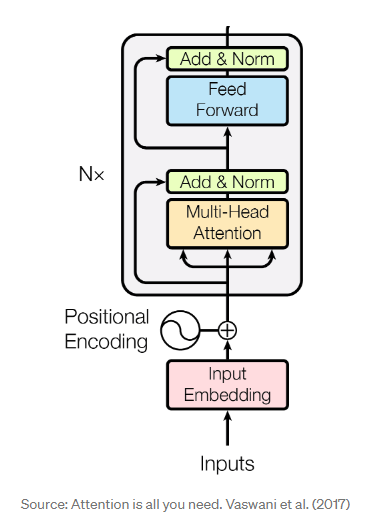


This network is pre-trained on large corpora on two main tasks:

1. Masked Language Model: Given an input sentence, some words are randomly (in the paper they choose 15% of the total words) replaced with a MASK token and the network is trained to predict these masked words.

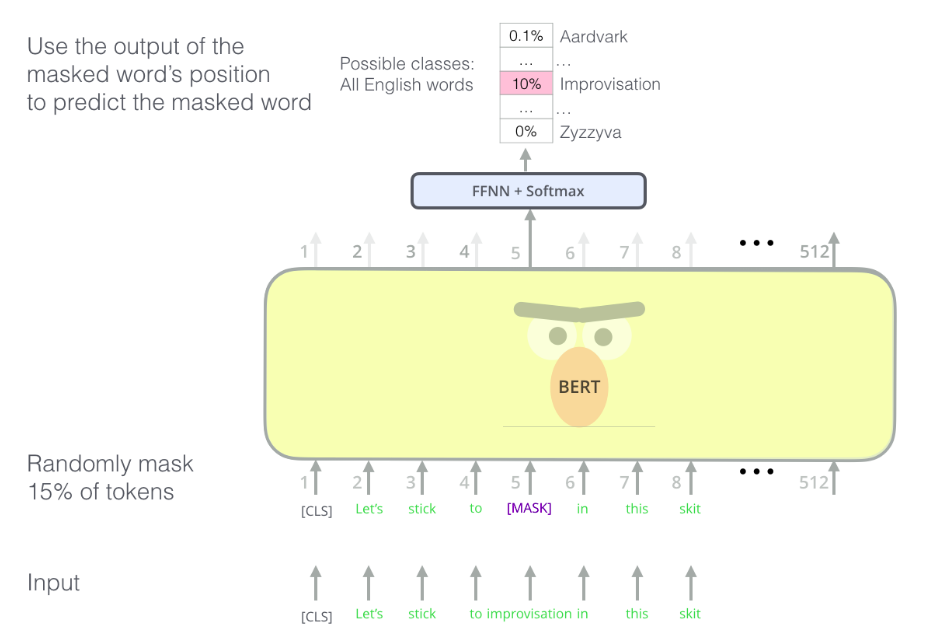


2. Next Sentence Prediction: BERT can also handle a pair of sequences as inputs. For these cases, the 2 sequences are separated by a [SEP] token. In addition to the masked LM Task, we also train BERT on the next sentence prediction problem, where given 2 sentences it needs to predict if the first sentence comes before second in the actual corpus.

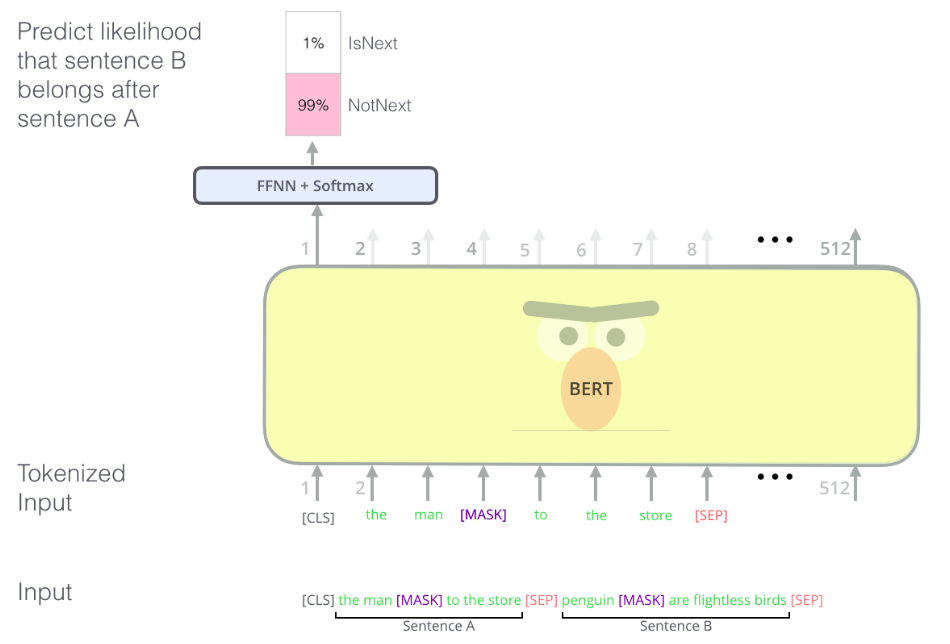

You may have noticed the [CLS] token in the figure, it is basically added to the beginning of each sequence (or pair of sequences) and is given the responsibility of sequence level classification. That’s why we used the embeddings of [CLS] token to predict if sentence A comes before B in the next sentence prediction task.

After BERT is trained on these 2 tasks, the learned model can be then used as a feature extractor for different NLP problems, where we can either keep the learned weights fixed and just learn the newly added task-specific layers or fine-tune the pre-trained layers too.

In [8]:
import torch
from torch.utils.data import DataLoader

from transformers import BertModel, BertTokenizer

def to_tensors(x):
    return (torch.tensor(x['input_ids']), torch.tensor(x['attention_mask']), torch.tensor(x['label']))

small_train_dataset_tensors = [to_tensors(x) for x in small_train_dataset]
small_eval_dataset_tensors = [to_tensors(x) for x in small_eval_dataset]

train_loader = DataLoader(small_train_dataset_tensors, batch_size=64)
val_loader = DataLoader(small_eval_dataset_tensors, batch_size=64)

In [9]:
import torch
import torch.nn as nn
from transformers import BertModel

class SentimentClassifier(nn.Module):

    def __init__(self, freeze_bert = True):
        super(SentimentClassifier, self).__init__()
        #Instantiating BERT model object 
        self.bert_layer = BertModel.from_pretrained('bert-base-uncased')
        
        #Freeze bert layers
        if freeze_bert:
            for p in self.bert_layer.parameters():
                # task: freeze bert training weights
                p.requires_grad = False
        
        #Classification layer
        self.cls_layer = nn.Linear(768, 1)

    def forward(self, seq, attn_masks):
        '''
            -seq : Tensor of shape [B, T] containing token ids of sequences
            -attn_masks : Tensor of shape [B, T] containing attention masks to be used to avoid contibution of PAD tokens
        '''

        #Feeding the input to BERT model to obtain contextualized representations
        output = self.bert_layer(seq, attention_mask=attn_masks)
        cont_reps = output.last_hidden_state  # task: get last hidden state from output

        #Obtaining the representation of [CLS] head
        cls_rep = cont_reps[:, 0]

        #Feeding cls_rep to the classifier layer
        logits = self.cls_layer(cls_rep)

        return logits

In [10]:
net = SentimentClassifier(freeze_bert=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr=2e-5)

In [12]:
def get_accuracy_from_logits(logits, labels):
    #Get a tensor of shape [B, 1, 1] with probabilities that the sentiment is positive
    probs = torch.sigmoid(logits.unsqueeze(-1))
    #Convert probabilities to predictions, 1 being positive and 0 being negative
    soft_probs = (probs > 0.5).long()
    #Check which predictions are the same as the ground truth and calculate the accuracy
    acc = (soft_probs.squeeze() == labels).float().mean()
    return acc

In [13]:
from tqdm.notebook import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train(net, criterion, optimizer, train_loader, val_loader):
    net = net.to(device)
    net.train()

    for epoch in range(5):
        for iteration, (seq, attn_masks, labels) in enumerate(tqdm((train_loader))):
            optimizer.zero_grad()
            seq, attn_masks, labels = seq.to(device), attn_masks.to(device), labels.to(device)

            logits = net(seq, attn_masks)  # task: model forward pass
            loss = criterion(logits.squeeze(-1), labels.float())
            loss.backward()
            optimizer.step()

        acc = get_accuracy_from_logits(logits, labels)
        print("Iteration {} of epoch {} complete. Loss : {} Accuracy : {}".format(iteration + 1, epoch + 1, loss.item(), acc))

In [14]:
!nvidia-smi

Mon Feb 27 18:06:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0    12W /  75W |     13MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
train(net, criterion, optimizer, train_loader, val_loader)

  0%|          | 0/16 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 768.00 MiB (GPU 0; 3.81 GiB total capacity; 2.47 GiB already allocated; 362.94 MiB free; 2.52 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
from datasets import load_metric

metric = load_metric("accuracy")
net.eval()

for seq, attn_masks, labels in val_loader:
    seq, attn_masks, labels = seq.to(device), attn_masks.to(device), labels.to(device)
    with torch.no_grad():
        logits = net(seq, attn_masks) # task: model forward pass

    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=labels)  # task: fill parameters

metric.compute()

In [19]:
def infer(net, text):
     # task: implement inference
     return label
    
text = " your positive or negative text"
label = infer(net, text)
print(label)

NameError: name 'label' is not defined

## BertForSequenceClassification Fine-tuning

In [20]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [21]:
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer")

In [22]:
# task: change the number of epochs to 5
training_args.num_train_epochs = 5

In [23]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, train_dataset=small_train_dataset, eval_dataset=small_eval_dataset)

AttributeError: module 'distutils' has no attribute 'version'

In [ ]:
# for param in model.bert.parameters():
#     # task: freeze bert training weights
#     param.requires_grad = False

In [ ]:
trainer.train()

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
# task: achieve 80% accuracy, you may also try unfreeze the bert parameters

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer.evaluate()

Links

[Painless Fine-Tuning of BERT in Pytorch](https://medium.com/swlh/painless-fine-tuning-of-bert-in-pytorch-b91c14912caa)

[Fine-tuning BERT by Hugging Face](https://huggingface.co/docs/transformers/v4.16.2/en/training)